!pip install imutils

In [1]:
# Common imports
import numpy as np
import os


# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

!pip install opencv

conda install -c conda-forge/label/gcc7 opencv

conda install -c menpo opencv

import zipfile
with zipfile.ZipFile("archive.zip","r") as zip_ref:
    zip_ref.extractall("targetdir")

In [2]:
 import os


In [3]:

os.getcwd()


'/home/LC/mbuako01/DS 420 Project 2'

from PIL import Image
import os, os.path

imgs = []
path = "/home/LC/chakth01/Neural networks"
valid_images = [".jpg",".gif",".png",".tga"]
for f in os.listdir(path):
    ext = os.path.splitext(f)[1]
    if ext.lower() not in valid_images:
        continue
    imgs.append(Image.open(os.path.join(path,f)))

In [4]:
#image_file_Path ="/home/LC/chakth01/Neural networks/targetdir/captcha_images/"
image_file_Path ="/home/LC/mbuako01/DS 420 Project 2/imageFolder/captcha_images/"

In [5]:
image_file_Path

'/home/LC/mbuako01/DS 420 Project 2/imageFolder/captcha_images/'

In [6]:
def read_image(image_file_path):
    """Read in an image file."""
    bgr_img = cv2.imread(image_file_path)
    b,g,r = cv2.split(bgr_img)       # get b,g,r
    rgb_img = cv2.merge([r,g,b])     # switch it to rgb
    
    return rgb_img 

In [7]:
import cv2
import imutils
import numpy as np
import os
from imutils import paths
import pandas as pd

In [8]:
images = []
labels = []

In [9]:
for image_file_path in imutils.paths.list_images(image_file_Path):
    image_file = read_image(image_file_path)
    label = image_file_path.split('/')[7]
    images.append(image_file)
    labels.append(label)
    

In [10]:
#images

In [11]:
#labels

In [12]:
newLabels = []

for label in labels:
    labelHere = label.split('.')[0]
    newLabels.append(labelHere)

In [13]:
#newLabels

In [14]:
images = np.array(images)
#images4Plot = np.array(images, dtype="float") / 255.0
labels = np.array(newLabels)

In [15]:
print(labels)

['GU3J' 'EFTZ' 'BVBR' ... 'QZW8' 'WXNY' 'R55D']


In [16]:
#print(images)

In [17]:
images.shape

(9955, 24, 72, 3)

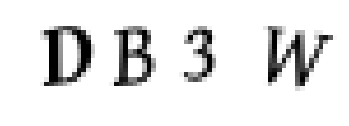

In [18]:
some_digit = images[300]
#Some_digit_image = some_digit.reshape(24, 72, 3)
plt.imshow(some_digit, cmap = mpl.cm.binary,
           interpolation="nearest")
plt.axis("off")


plt.show()

In [19]:
labels[300]

'DB3W'

In [20]:
import os
import os.path
import cv2
import glob
import imutils


In [21]:
def pureBlackWhiteConversionThreshold(image):
    # Add some extra padding around the image
    imagePadded = cv2.copyMakeBorder(image, 8, 8, 8, 8, cv2.BORDER_REPLICATE)
    gray = cv2.cvtColor(imagePadded, cv2.COLOR_RGB2GRAY)
    # threshold the image (convert it to pure black and white)
    imagethresholded = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]    
    return imagethresholded 

In [22]:
def pureBlackWhiteConversionOGImage(image):
    # Add some extra padding around the image
    imagePadded = cv2.copyMakeBorder(image, 8, 8, 8, 8, cv2.BORDER_REPLICATE)
    gray = cv2.cvtColor(imagePadded, cv2.COLOR_RGB2GRAY)
       
    return gray 

In [23]:
padded_ThreshImage300 = pureBlackWhiteConversionThreshold(images[300])

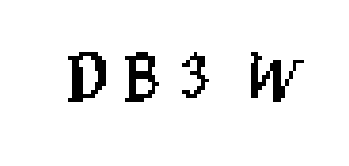

In [24]:
some_digit = padded_ThreshImage300

plt.imshow(some_digit, cmap = mpl.cm.binary,
           interpolation="nearest")
plt.axis("off")


plt.show()

In [25]:
def regionsOfLetters(image):
    
     # find the contours (continuous blobs of pixels) the image
    contours = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Hack for compatibility with different OpenCV versions
    contours = contours[0] if imutils.is_cv2() else contours[1]

    letter_image_regions = []
    
    # Now we can loop through each of the four contours and extract the letter
    # inside of each one
    for contour in contours:
        # Get the rectangle that contains the contour
        (x, y, w, h) = cv2.boundingRect(contour)

        # Compare the width and height of the contour to detect letters that
        # are conjoined into one chunk
        if w / h > 1.25:
            # This contour is too wide to be a single letter!
            # Split it in half into two letter regions!
            half_width = int(w / 2)
            letter_image_regions.append((x, y, half_width, h))
            letter_image_regions.append((x + half_width, y, half_width, h))
        else:
            # This is a normal letter by itself
            letter_image_regions.append((x, y, w, h))
    # If we found more or less than 4 letters in the captcha, our letter extraction
    # didn't work correcly. Skip the image instead of saving bad training data!
    #if len(letter_image_regions) != 4:
       # continue

    # Sort the detected letter images based on the x coordinate to make sure
    # we are processing them from left-to-right so we match the right image
    # with the right letter
    letter_image_regions = sorted(letter_image_regions, key=lambda x: x[0])
    
    return letter_image_regions 

In [26]:
letter_image_regions = regionsOfLetters(padded_ThreshImage300)
letter_image_regions

[(16, 12, 10, 13), (31, 12, 9, 13), (46, 12, 7, 12), (64, 12, 14, 13)]

In [27]:
def extractLetters(letter_image_regions, image):
    # Save out each letter as a single image
    letter_images =[]
    for letter_bounding_box in letter_image_regions:
        # Grab the coordinates of the letter in the image
        x, y, w, h = letter_bounding_box

        # Extract the letter from the original image with a 2-pixel margin around the edge
        letter_image = image[y - 2:y + h + 2, x - 2:x + w + 2]
        #image_file1 = read_image(letter_image)
        letter_images.append(letter_image)
    return letter_images 
    

In [28]:
grayScaleImage = pureBlackWhiteConversionOGImage(images[300])
letter_image_List = extractLetters(letter_image_regions,grayScaleImage)


In [29]:
checkImage = letter_image_List[3]

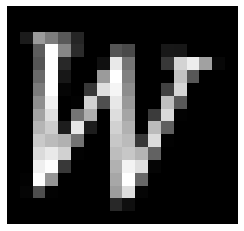

In [30]:
some_digit = checkImage
#Some_digit_image = some_digit.reshape(24, 72, 3)
plt.imshow(some_digit, cmap = mpl.cm.binary,
           interpolation="nearest")
plt.axis("off")


plt.show()

In [31]:
len(labels)

9955

In [32]:
len(images)

9955

In [33]:
images.shape

(9955, 24, 72, 3)

In [34]:
def expand2square(image):
    desired_size = 28
    im = image
    old_size = im.shape[:2] # old_size is in (height, width) format

    ratio = float(desired_size)/max(old_size)
    new_size = tuple([int(x*ratio) for x in old_size])

    # new_size should be in (width, height) format

    im = cv2.resize(im, (new_size[1], new_size[0]))

    delta_w = desired_size - new_size[1]
    delta_h = desired_size - new_size[0]
    top, bottom = delta_h//2, delta_h-(delta_h//2)
    left, right = delta_w//2, delta_w-(delta_w//2)

    color = [255, 255, 255]
    new_im = cv2.copyMakeBorder(im, top, bottom, left, right, cv2.BORDER_CONSTANT,
        value=color)
    return new_im

In [35]:
letterImages = []
letterImageLabels = []


# loop over the unseparated image list
for label, image in zip(labels, images):
    
    padded_ThreshImage300 = pureBlackWhiteConversionThreshold(image)
    letter_image_regions = regionsOfLetters(padded_ThreshImage300)
    grayScaleImage = pureBlackWhiteConversionOGImage(image)
    letter_image_List = extractLetters(letter_image_regions,grayScaleImage)
     #image_reshape = letter_bounding_box.reshape(L0, L1)
    for letter_bounding_box, letter_text in zip(letter_image_List, label): 
        L0=letter_bounding_box.shape[0]
        L1=letter_bounding_box.shape[1]
       
        imageResize = expand2square(letter_bounding_box)
        letterImages.append(imageResize)
        letterImageLabels.append(letter_text)
    
        
        

In [36]:
len(letterImages)

39754

In [37]:
len(letterImageLabels)

39754

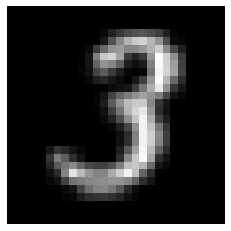

In [38]:
displayDigit = letterImages[609]

plt.imshow(displayDigit, cmap = mpl.cm.binary,
           interpolation="nearest")
plt.axis("off")


plt.show()

In [39]:
letterImages[609].shape

(28, 28)

In [40]:
images = np.array(letterImages)
labels = np.array(letterImageLabels)

In [41]:
 images.shape


(39754, 28, 28)

In [42]:
def plot_digit(image):
    some_digit = image
    plt.imshow(some_digit, cmap = mpl.cm.binary,
               interpolation="nearest")
    plt.axis("off")


    plt.show()

In [43]:
# EXTRA
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

In [44]:
index, = np.where(labels == 'F')
index

array([    5,    32,    94, ..., 39720, 39722, 39736])

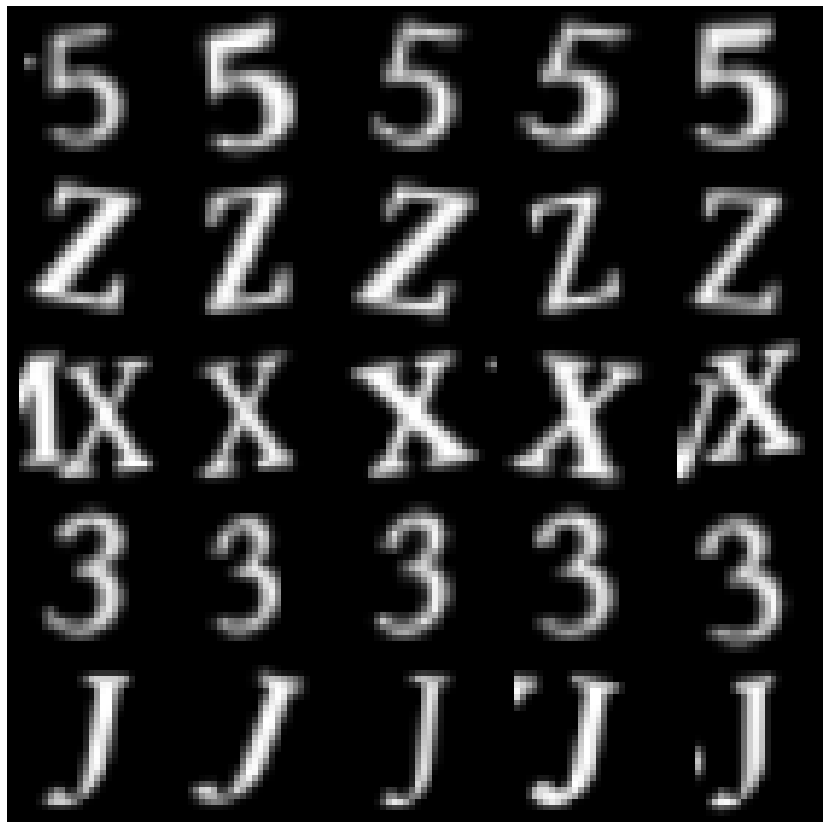

In [45]:
plt.figure(figsize=(15, 15))
example_images = np.r_[images[[14,39,51,39702,39752]], 
                       images[[7,56,61,39703,39714]],
                       images[[45,   198,   352,39705, 39719]], 
                       images[[2,    12,    52, 39698, 39712]], 
                       images[[3,    26,    87, 39612, 39619]]]

example_images
plot_digits(example_images, images_per_row=5)
#save_fig("more_digits_plot")
#plt.show()

## 4. Prepare Data for RandomForest Model

In [46]:
images3DTo2D = images.reshape(39754, 28 * 28)
images3DTo2D.shape

(39754, 784)

In [47]:
X, y = images3DTo2D, labels
X.shape

(39754, 784)

In [48]:
np.unique(y)

array(['2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E',
       'F', 'G', 'H', 'J', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T',
       'U', 'V', 'W', 'X', 'Y', 'Z'], dtype='<U1')

## 5. Train test split

In [49]:
from sklearn.model_selection import train_test_split

(X_train, X_test, y_train, y_test) = train_test_split(
    X, y, test_size=0.2, random_state=11
)

In [50]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(n_estimators=10, random_state=42)

In [51]:
forest_clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=42)

### Random Forest training set Performance

In [52]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))


In [53]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score



In [54]:
def plot_confusion_matrix(matrix):
    """If you prefer color and a colorbar"""
    fig = plt.figure(figsize=(5,5))
    ax = fig.add_subplot(111)
    cax = ax.matshow(matrix)
    fig.colorbar(cax)

In [55]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import precision_recall_curve, roc_curve
from sklearn.preprocessing import label_binarize

import matplotlib.pyplot as plt
#%matplotlib inline


# Binarize the output
y_trainBinarize = label_binarize(y_train, classes=np.unique(y))
n_classes = y_trainBinarize.shape[1]
n_classes

clf = OneVsRestClassifier(forest_clf)
clf.fit(X_train, y_trainBinarize)

y_score = clf.predict_proba(X_train)

In [56]:
y_train_pred = cross_val_predict(clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[940,   0,   1, ...,   2,   0,   0],
       [  0, 980,   0, ...,   1,   2,   1],
       [  0,   0, 922, ...,   0,   1,   2],
       ...,
       [  2,   0,   0, ..., 973,   0,   1],
       [  1,   0,   1, ...,   0, 981,   1],
       [  2,   0,   0, ...,   1,   2, 999]])

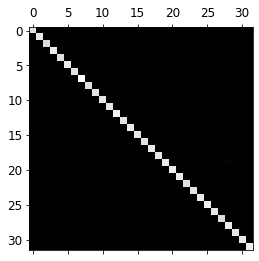

In [57]:
plt.matshow(conf_mx, cmap=plt.cm.gray)

plt.show()

In [58]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums


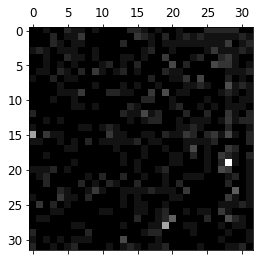

In [59]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)

plt.show()

In [60]:
accuracy_score(y_train, y_train_pred)

0.9795616765713926

In [61]:
precision_score(y_train, y_train_pred, average='micro')

0.9795616765713926

In [62]:
recall_score(y_train, y_train_pred, average='micro')

0.9795616765713926

In [63]:
f1_score(y_train, y_train_pred, average='micro')

0.9795616765713926

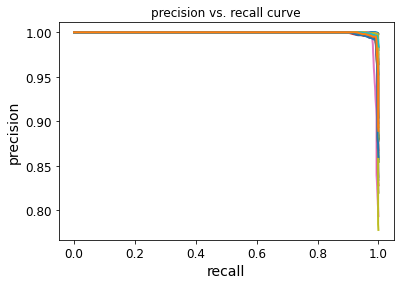

In [64]:

# precision recall curve
precision = dict()
recall = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_trainBinarize[:, i],
                                                        y_score[:, i])
    plt.plot(recall[i], precision[i], lw=2)
    
plt.xlabel("recall")
plt.ylabel("precision")
#plt.legend(loc="upper left")
plt.title("precision vs. recall curve")
plt.show()


### Training set ROC curves 

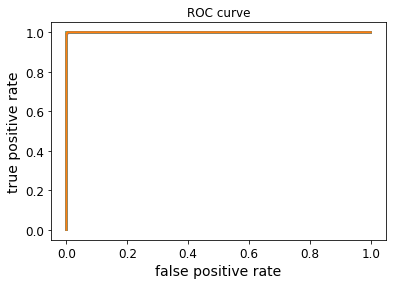

In [65]:

# roc curve
fpr = dict()
tpr = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_trainBinarize[:, i],
                                  (y_score[:, i]))
    plt.plot(fpr[i], tpr[i], lw=2)

plt.xlabel("false positive rate")
plt.ylabel("true positive rate")

plt.title("ROC curve")
plt.show()

### Random Forest test set Performance


In [66]:
X_test_scaled = scaler.fit_transform(X_test.astype(np.float64))
y_test_pred = cross_val_predict(clf, X_test_scaled, y_test, cv=3)
conf_mx = confusion_matrix(y_test, y_test_pred)
conf_mx

array([[255,   0,   0, ...,   0,   0,   0],
       [  0, 213,   0, ...,   0,   0,   0],
       [  0,   0, 272, ...,   0,   0,   0],
       ...,
       [  1,   0,   0, ..., 235,   1,   0],
       [  0,   0,   0, ...,   1, 247,   0],
       [  2,   0,   1, ...,   0,   1, 229]])

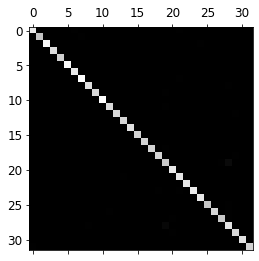

In [67]:
plt.matshow(conf_mx, cmap=plt.cm.gray)

plt.show()

In [68]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums


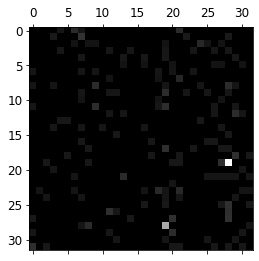

In [69]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)

plt.show()

In [70]:
accuracy_score(y_test, y_test_pred)

0.9752232423594517

In [71]:
precision_score(y_test, y_test_pred, average='micro')

0.9752232423594517

In [72]:
recall_score(y_test, y_test_pred, average='micro')

0.9752232423594517

In [73]:
f1_score(y_test, y_test_pred, average='micro')

0.9752232423594517

In [74]:
y_testBinarize = label_binarize(y_test, classes=np.unique(y))
y_scoretest = clf.predict_proba(X_test)

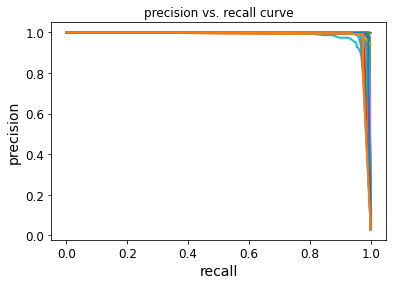

In [75]:
# precision recall curve
precision = dict()
recall = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_testBinarize[:, i],
                                                        y_scoretest[:, i])
    plt.plot(recall[i], precision[i], lw=2)
    
plt.xlabel("recall")
plt.ylabel("precision")
#plt.legend(loc="upper left")
plt.title("precision vs. recall curve")
plt.show()

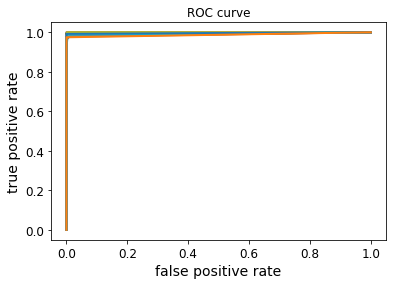

In [76]:

# roc curve
fpr = dict()
tpr = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_testBinarize[:, i],
                                  (y_scoretest[:, i]))
    plt.plot(fpr[i], tpr[i], lw=2)

plt.xlabel("false positive rate")
plt.ylabel("true positive rate")

plt.title("ROC curve")
plt.show()

In [77]:
uniqueCharacters = np.unique(y)
uniqueCharacters

array(['2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E',
       'F', 'G', 'H', 'J', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T',
       'U', 'V', 'W', 'X', 'Y', 'Z'], dtype='<U1')

In [78]:
W = uniqueCharacters[28]

In [79]:
M = uniqueCharacters[19]

In [80]:
indexM, = np.where(labels == M)
indexM

array([   44,    48,    59, ..., 39662, 39670, 39699])

In [81]:
indexW, = np.where(labels == W)
indexW

array([   27,    41,    47, ..., 39718, 39744, 39746])

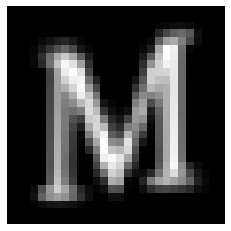

In [82]:
plot_digit(images[indexM[789]])

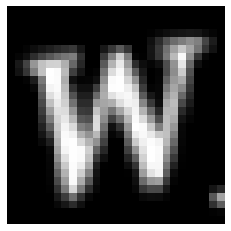

In [83]:
plot_digit(images[indexW[789]])

In [84]:
cl_a = 'M'
cl_b = 'W'

X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]



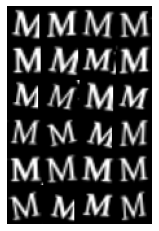

In [85]:
 plot_digits(X_aa[:24], images_per_row=4)

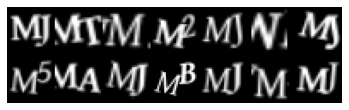

In [86]:
plot_digits(X_ab, images_per_row=7)

In [87]:
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]

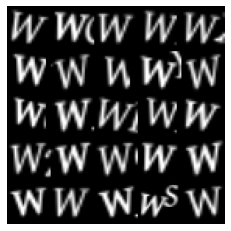

In [88]:
plot_digits(X_bb[:25], images_per_row=5)

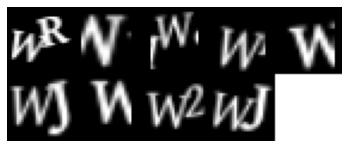

In [89]:
plot_digits(X_ba, images_per_row=5)

## Images and labels to CSV dataset

In [90]:
X.shape

(39754, 784)

In [97]:
y[0]

'G'

In [92]:
X[0]

array([255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       254, 248, 240, 230, 225, 222, 228, 236, 247, 254, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 254, 237, 216, 189, 176, 171, 186, 206, 236, 252, 254,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 248, 235, 199, 159, 155, 154, 158, 149, 134, 118, 109, 126,
       155, 195, 227, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 254, 252, 235, 203, 138,  72,  85, 106, 140, 137, 114,  67,
        28,  24,  61, 138, 201, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 250, 227, 177,  99, 102, 128, 168, 198, 211, 210,
       201, 172, 136,  74,  83, 163, 214, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 253, 240, 185, 120,  45,  98, 183, 22

In [102]:
imagesDF = pd.DataFrame(X)

In [103]:
imagesDF.head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
1,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
2,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
3,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
4,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255


In [104]:
imagesDF ['labels'] = y

In [105]:
imagesDF.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,labels
0,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,G
1,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,U
2,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,3
3,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,J
4,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,E


In [106]:
#Saving the clean Dataset
#imagesDF.to_csv('imagesDF.csv', encoding='utf-8')